# **Coursework Machine Learning Project**

## **Machine Learning for Modeling**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Load the Data set:

In [ ]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/FloridaBikeRentals.csv', encoding = "ISO-8859-1")
df

#### Data Description:
- **Date** --> Date in year-month-day format
- **Windspeed** --> Speed of the wind in meters per sec (m/s)
- **Rented Bike count** --> Count of bikes rented each hour
- **Visibility** --> Visibility in meters
- **Hour** --> Hour of the day
- **Dew point temperature** --> Dew point temperature in Celsius
- **Temperature** --> Temperature in Celsius
- **Solar radiation** --> Radiant energy from the sun measured in MJ/m2
- **Humidity** --> Humidity in percentage
- **Rainfall** --> Rainfall in mm
- **Snowfall** --> Snowfall in cm
- **Seasons** --> Season of the year – Winter, Summer, Spring, and Fall
- **Functional Day** --> Bike rented during functional (Fun) and nonfunctional hours (NoFunc)
- **Holiday** --> Is it a holiday? Holiday/ No holiday


#### **Task**: 
Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall,
holidays, and many other factors, build a model to **predict the bike count required** for a stable supply of rental
bikes.

1. Check for null values in any columns and handle the missing values:

In [84]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

> Therefore, NO nulls present in data

2. Convert Date columns to Date format and extract day, month, day of week, and weekdays/weekend from date
column

In [85]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [86]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [87]:
date = pd.to_datetime(df['Date'], format='%d/%m/%Y')
date.head()

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
Name: Date, dtype: datetime64[ns]

Extracting year

In [88]:
date.loc[0].year
date.loc[1].year

2017

In [89]:
for i in range(0,len(date)):
    print(date.loc[i].year)

2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017


Extracting day

In [90]:
for i in range(0,len(date)):
    print(date.loc[i].day)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1

Extracting month 

In [91]:
for i in range(0,len(date)):
    print(date.loc[i].month)

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Extracting Day of week

In [92]:
for i in range(0,len(date)):
    print(date.loc[i].day_of_week)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


Extracting Day of Week

In [93]:
for i in range(0,len(date)):
    print(date.loc[i].strftime('%A'))

Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Friday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Saturday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Sunday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Monday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesda

3. Check correlation of features using heatmap. Provide your observations and recommendation to reduce multicollinearity.

In [94]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Correlation Matrix:

In [96]:
corr_matrix = df.drop(columns=['Rented Bike Count','Date', 'Holiday','Functioning Day','Seasons'])
corr_matrix.corr()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Hour,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Heatmap:

In [97]:
# sns.heatmap(corr_matrix, annot=True)

4. Plot the distribution plot of Rented Bike Count 

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

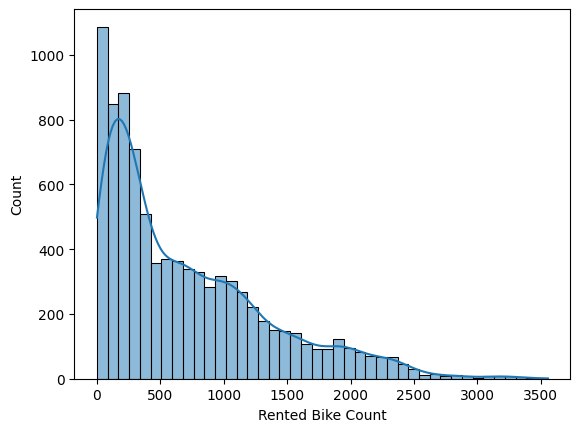

In [98]:
sns.histplot(df['Rented Bike Count'], kde = True)

5. Plot the histogram of all numerical features:

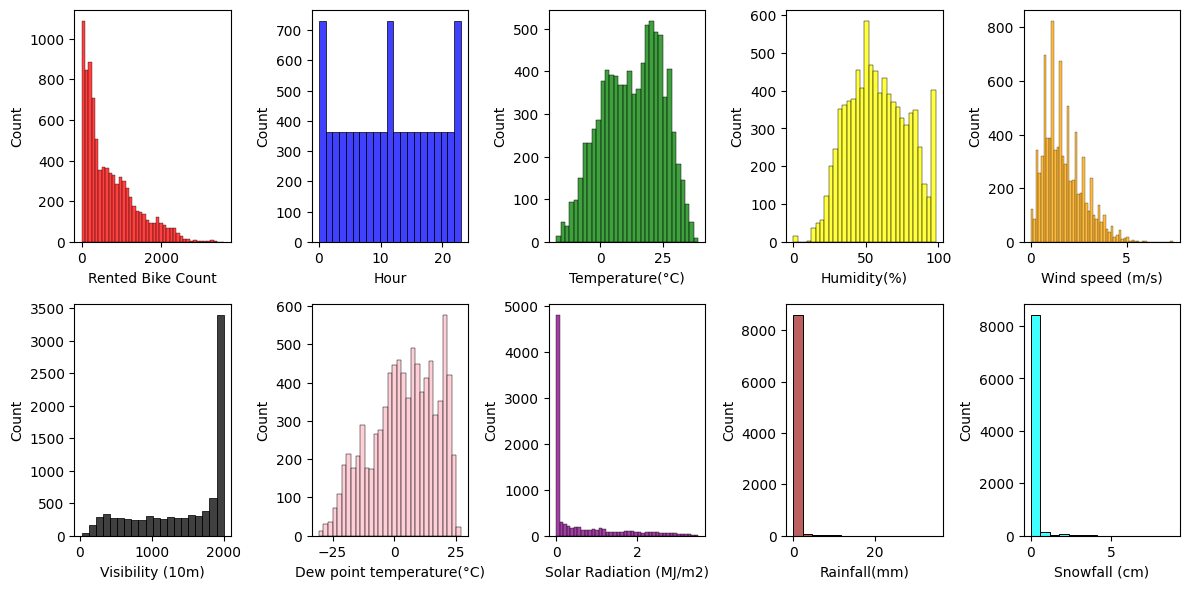

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12,6))

sns.histplot(data=df, x='Rented Bike Count', ax=axes[0,0], color='red')
sns.histplot(data=df, x='Hour', ax=axes[0,1], color='blue')
sns.histplot(data=df, x='Temperature(°C)', ax=axes[0,2], color='green')
sns.histplot(data=df, x='Humidity(%)', ax=axes[0,3], color='yellow')
sns.histplot(data=df, x='Wind speed (m/s)', ax=axes[0,4], color='orange')
sns.histplot(data=df, x='Visibility (10m)', ax=axes[1,0], color='black')
sns.histplot(data=df, x='Dew point temperature(°C)', ax=axes[1,1], color='pink')
sns.histplot(data=df, x='Solar Radiation (MJ/m2)', ax=axes[1,2], color='purple')
sns.histplot(data=df, x='Rainfall(mm)', ax=axes[1,3], color='brown')
sns.histplot(data=df, x='Snowfall (cm)', ax=axes[1,4], color='cyan')

fig.tight_layout()          #to improve layout

6. Plot the box plot of **Rented Bike Count** against **all the categorical features** (Hint: Categorical features on X-axis
and Rented Bike Count on Y-axis)

Categorical Columns are = Holiday, Functioning Day, Seasons

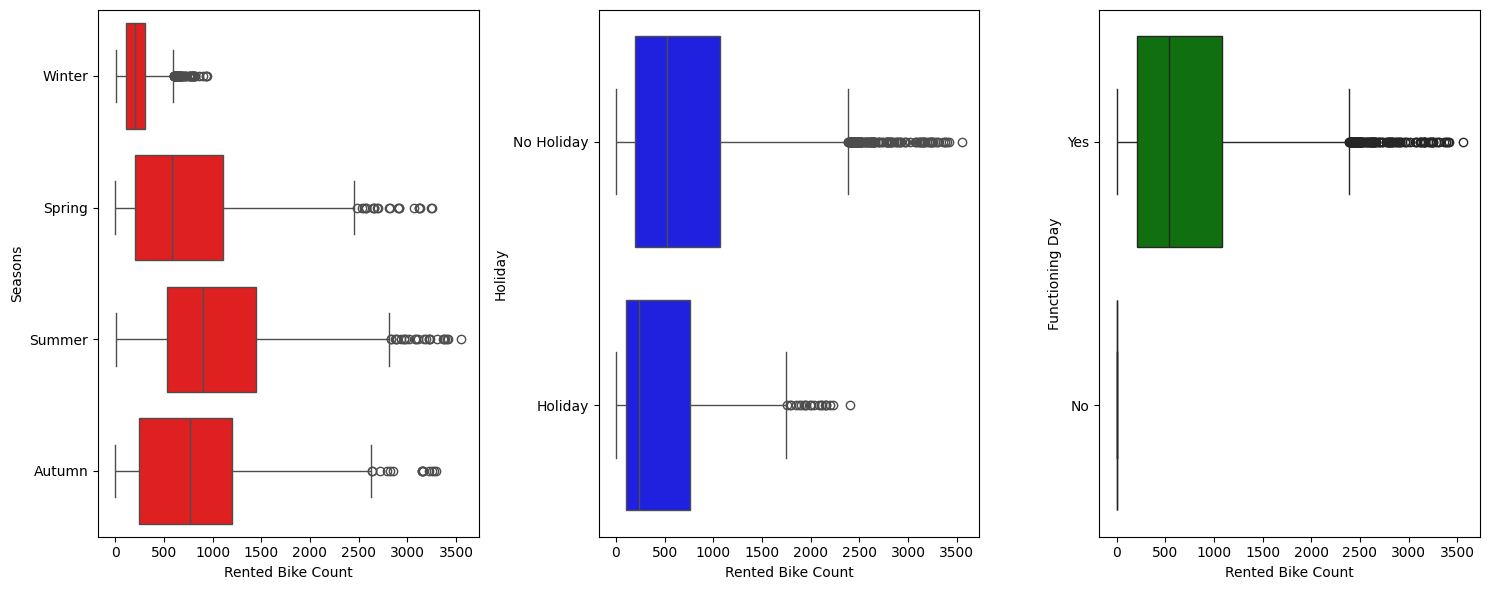

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

sns.boxplot(data=df, x='Rented Bike Count', y='Seasons',ax=axes[0], color='red')
sns.boxplot(data=df, x='Rented Bike Count', y='Holiday',ax=axes[1], color='blue')
sns.boxplot(data=df, x='Rented Bike Count', y='Functioning Day',ax=axes[2], color='green')

fig.tight_layout()          #to improve layout

7. Plot the Seaborn catplot of Rented Bike Count against features like Hour, Holiday, weekdays, weekend, and
seasons. Give your inferences.

Adding day_of_week as column to dataframe

In [101]:
df['day_of_week']=pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.dayofweek
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week'],
      dtype='object')

/home/vinayakgaur07/.local/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/vinayakgaur07/.local/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/vinayakgaur07/.local/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/home/vinayakgaur07/.local/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


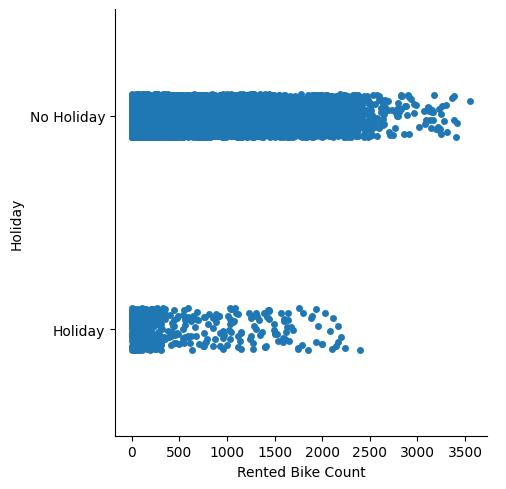

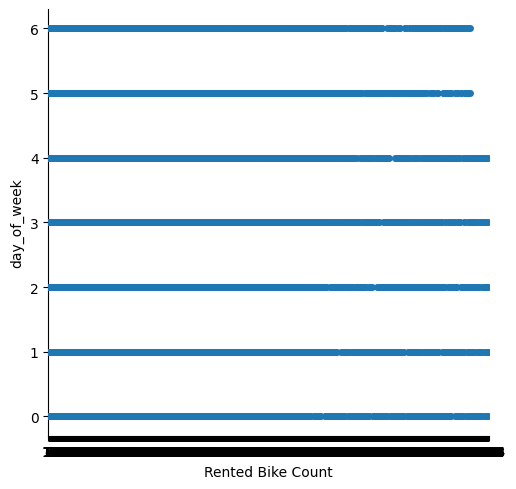

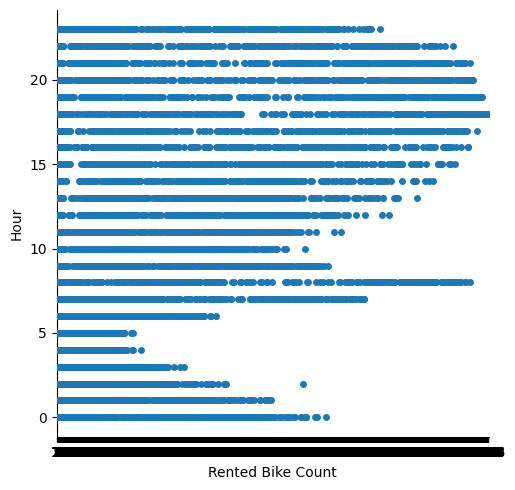

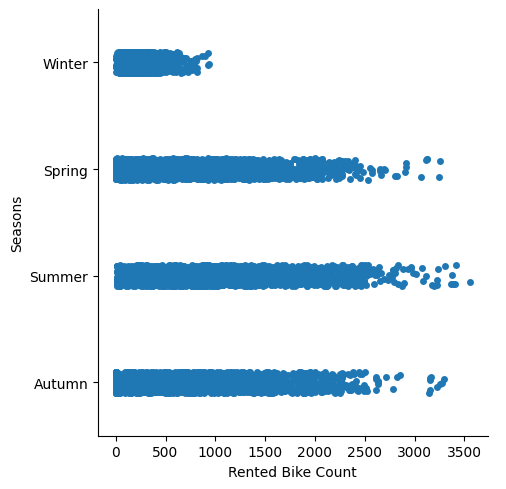

In [106]:
sns.catplot(data=df, x='Rented Bike Count', y='Holiday', ax=axes[0,0])

sns.catplot(data=df, x='Rented Bike Count', y='day_of_week', ax=axes[0,1])

# sns.catplot(data=df, x='Rented Bike Count', y='Weekend', ax=axes[0,2])
sns.catplot(data=df, x='Rented Bike Count', y='Hour', ax=axes[1,0])
sns.catplot(data=df, x='Rented Bike Count', y='Seasons', ax=axes[1,1])

8. Build a violin plot for Seasons and Rainfall(mm). Provide your observation

In [107]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week'],
      dtype='object')

Text(0.5, 1.0, 'Rainfall across different seasons')

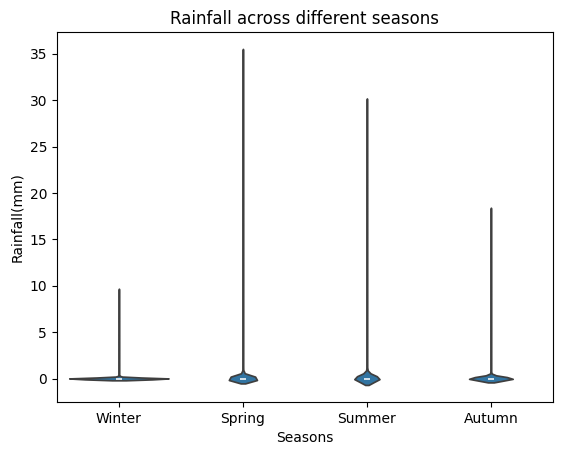

In [112]:
sns.violinplot(data=df, x='Seasons', y='Rainfall(mm)')
plt.title("Rainfall across different seasons")

9. Encode the categorical features into numerical features. (Hint: use get_dummies() and factorize()
accordingly)
- We do **Label Encoding(Using factorize)** for Holiday and Functioning Day
- We do **One-Hot Encoding(using get_dummies)** for Seasons

In [113]:
#label encoding
df['Holiday'] = pd.factorize(df['Holiday'])[0]
df['Functioning Day'] = pd.factorize(df['Functioning Day'])[0]

#one-hot encoding
df = pd.get_dummies(data=df, columns=['Seasons'], dtype=int)

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,4,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,4,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,4,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,4,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,4,0,0,0,1


10. Perform Standard Scaling of the train dataset.

In [ ]:
X= df.drop(columns=['Rented Bike Count','Date'])     #train data
y= df['Rented Bike Count']                           #test data

In [118]:
from sklearn.preprocessing import StandardScaler

df_StandardScaling = StandardScaler().fit_transform(X)
df_StandardScaling

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.58051386,
        -0.58051386,  1.74801475],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.58051386,
        -0.58051386, -0.57207755]])

11. Split the dataset into train and test with a ratio of 80:20 and random state 1

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

12. Perform Linear Regression, Lasso Regression, and Ridge Regression to predict the bike count required
and compare the results.

Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Lasso Regression

In [126]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/home/vinayakgaur07/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.444e+05, tolerance: 2.920e+05
  model = cd_fast.enet_coordinate_descent(


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


Ridge Regression

In [127]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


Comparision:


In [136]:
lr_model_pred = lr_model.predict(X_test)
lasso_model_pred = lasso_model.predict(X_test)
ridge_model_pred = ridge_model.predict(X_test)

In [137]:
np.round((lr_model.predict(X_test),lasso_model.predict(X_test),ridge_model.predict(X_test)),2)

array([[635.25, 970.41, 746.98, ..., 684.61, 893.34, 555.75],
       [651.11, 963.2 , 746.36, ..., 680.16, 886.18, 547.17],
       [635.44, 969.88, 746.9 , ..., 684.02, 893.23, 555.15]])

13. Run your evaluation using regression metrics

In [139]:
from sklearn.metrics import r2_score

In [140]:
print("Linear Regression Score:", r2_score(y_test, lr_model_pred))
print("Lasso Regression Score:", r2_score(y_test, lasso_model_pred))
print("Ridge Regression Score:", r2_score(y_test, ridge_model_pred))

Linear Regression Score: 0.5468443602037557
Lasso Regression Score: 0.5469848671232831
Ridge Regression Score: 0.5468333820205737
